Arshad Ali
CodeAlpha
Machine Learning
CA / DF1 / 15124
Minimum Submission Tasks = 02
ML Task 1

In [ ]:
# Explain thru short method by create mannual data set to understand

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Step 1: Create synthetic dataset
np.random.seed(42)
n_samples = 1000

data = pd.DataFrame({
    'income': np.random.normal(5000, 2000, n_samples),          # monthly income
    'total_debt': np.random.normal(15000, 10000, n_samples),    # total debt
    'num_late_payments': np.random.poisson(2, n_samples),       # number of late payments
    'credit_history_length': np.random.randint(1, 20, n_samples) # years
})

# Generate binary target (1 = creditworthy, 0 = not)
# Simple rule: high income, low debt, few late payments → creditworthy
data['creditworthy'] = ((data['income'] > 4000) &
                        (data['total_debt'] < 20000) &
                        (data['num_late_payments'] < 3)).astype(int)

# Step 2: Feature engineering
data['debt_to_income'] = data['total_debt'] / (data['income'] + 1)  # avoid division by zero
data['late_payment_ratio'] = data['num_late_payments'] / (data['credit_history_length'] + 1)

# Features and target
X = data[['income', 'total_debt', 'num_late_payments', 'credit_history_length',
          'debt_to_income', 'late_payment_ratio']]
y = data['creditworthy']

# Step 3: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train_scaled, y_train)

# Step 6: Predict and evaluate

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]  # probability for ROC-AUC

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)

print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))
print("F1 Score:", round(f1, 3))
print("ROC-AUC:", round(roc_auc, 3))
print("Confusion Matrix:\n", cm)


Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0
Confusion Matrix:
 [[137   0]
 [  0  63]]


In [ ]:
# Lets move towards the task on the dataset

# Import Lib require to perform the task

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, roc_curve, precision_recall_curve
)


In [ ]:
# Go for Load dataset

data = pd.read_csv("cs-training.csv", index_col=0)
target_col = 'SeriousDlqin2yrs'

X = data.drop(columns=[target_col])
y = data[target_col]

In [ ]:
# Handle missing values and transform

imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)


In [ ]:
# Train/test split

X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Feature scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 5. Hyperparameter tuning

param_grid = {

# this parameters can be use for more details which take too much time
    # 'n_estimators': [100, 200],
    # 'learning_rate': [0.05, 0.1],
    # 'max_depth': [3, 5],
    # 'min_samples_split': [2, 5],
    # 'min_samples_leaf': [1, 3]

 # lets short it, can't wait too long
    'n_estimators': [5, 10],
    'learning_rate': [0.05, 0.1],
    'max_depth': [2, 4],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 3]

}

In [ ]:
# pull it for result

gbc = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=gbc,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=1
)

In [ ]:
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


In [ ]:
# Evaluate the model

y_pred = best_model.predict(X_test_scaled)
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)

print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1 Score:", round(f1, 4))
print("ROC-AUC:", round(roc_auc, 4))
print("Confusion Matrix:\n", cm)


Precision: 0.6842
Recall: 0.013
F1 Score: 0.0255
ROC-AUC: 0.8523
Confusion Matrix:
 [[27983    12]
 [ 1979    26]]


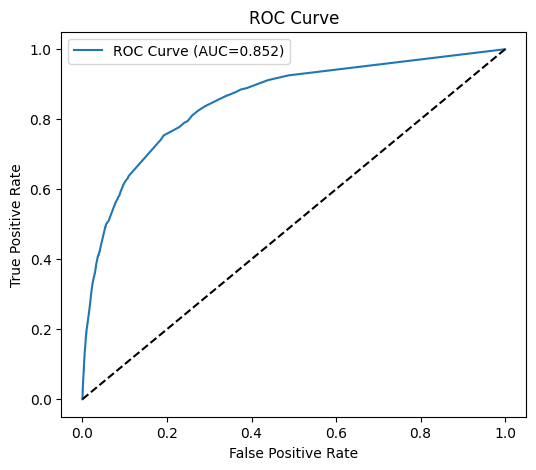

In [ ]:
# Plot on ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


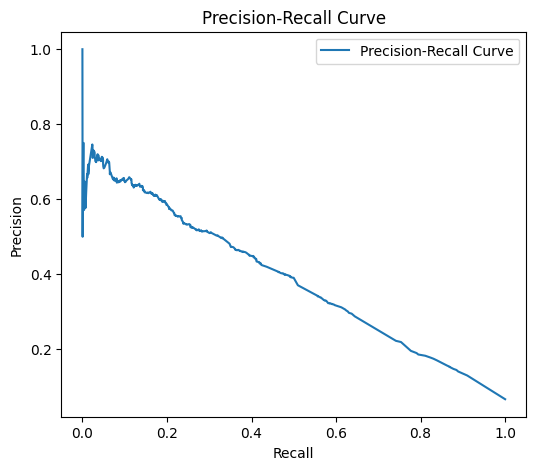

In [ ]:
# Plot Precision-Recall Curve

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(recall_vals, precision_vals, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


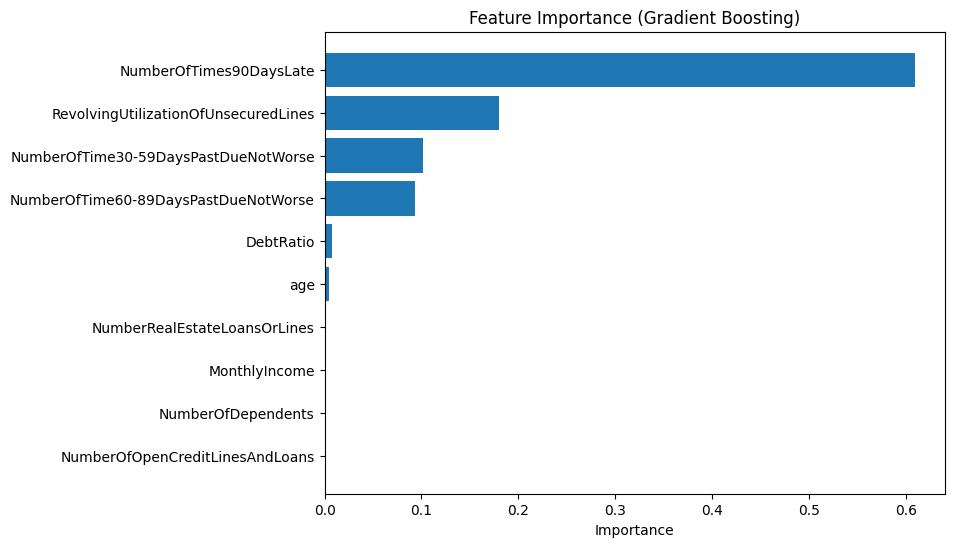

In [ ]:
# 9. Plot Feature Importance

feature_importance = best_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 6))
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Importance")
plt.title("Feature Importance (Gradient Boosting)")
plt.show()

In [ ]:
print("In this project, we try to predict whether a customer is likely to default within the next two years using a Gradient Boosting model. First, the data is cleaned by filling in missing values and scaling the features, then it’s split into training and test sets. We fine-tune the model using GridSearchCV, focusing on ROC-AUC to get the best performance.Finally, we evaluate the model using precision, recall, F1-score, and ROC-AUC, and visualize the results with ROC and Precision-Recall curves.")

In this project, we try to predict whether a customer is likely to default within the next two years using a Gradient Boosting model. First, the data is cleaned by filling in missing values and scaling the features, then it’s split into training and test sets. We fine-tune the model using GridSearchCV, focusing on ROC-AUC to get the best performance.Finally, we evaluate the model using precision, recall, F1-score, and ROC-AUC, and visualize the results with ROC and Precision-Recall curves.


In [ ]:
# The End